In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly

In [2]:
df = pd.read_csv("final_data.csv", index_col=0)
df

,SKU,STORE,COST,RETAIL,SALEDATE,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,CITY,STATE,ZIP
0,3,202,123.36,440.0,2005-01-18,P,1,440.0,30.00,30.00,TAMPA,FL,33612
1,3,202,123.36,440.0,2005-01-29,R,1,440.0,30.00,30.00,TAMPA,FL,33612
2,3,303,0.00,0.0,2004-08-18,P,1,0.0,12.00,12.00,ST. ANN,MO,63074
3,3,709,0.00,0.0,2005-08-14,P,1,0.0,30.00,30.00,GLENDALE,AZ,85308
4,3,802,123.36,440.0,2005-08-09,P,1,440.0,30.00,30.00,CLEARWATER,FL,33761
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120916891,9999997,7507,15.00,19.5,2005-04-23,P,1,39.0,39.00,39.00,HOUSTON,TX,77056
120916892,9999997,7907,15.00,19.5,2005-05-03,P,1,39.0,39.00,39.00,FRIENDSWOOD,TX,77546
120916893,9999997,7907,15.00,19.5,2005-05-04,R,1,39.0,39.00,39.00,FRIENDSWOOD,TX,77546
120916894,9999997,7907,15.00,19.5,2005-05-04,P,1,39.0,39.00,39.00,FRIENDSWOOD,TX,77546


In [3]:
df = df[df['COST'] != 0]

In [4]:
# Convert SALEDATE to datetime
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'])
df['month_year'] = pd.to_datetime(df['SALEDATE'].dt.to_period('M').dt.strftime('%Y-%m'))
df.drop('SALEDATE', axis=1, inplace=True)

/var/folders/6r/cwd2y27x0yq0d6dg5cj_ndb00000gn/T/ipykernel_8235/2753903154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALEDATE'] = pd.to_datetime(df['SALEDATE'])
/var/folders/6r/cwd2y27x0yq0d6dg5cj_ndb00000gn/T/ipykernel_8235/2753903154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year'] = pd.to_datetime(df['SALEDATE'].dt.to_period('M').dt.strftime('%Y-%m'))
/var/folders/6r/cwd2y27x0yq0d6dg5cj_ndb00000gn/T/ipykernel_8235/2753903154.py:4: SettingWithCopyWarning: 
A value is tryi

In [5]:
df

,SKU,STORE,COST,RETAIL,STYPE,QUANTITY,ORGPRICE,SPRICE,AMT,CITY,STATE,ZIP,month_year
0,3,202,123.36,440.0,P,1,440.0,30.00,30.00,TAMPA,FL,33612,2005-01-01
1,3,202,123.36,440.0,R,1,440.0,30.00,30.00,TAMPA,FL,33612,2005-01-01
4,3,802,123.36,440.0,P,1,440.0,30.00,30.00,CLEARWATER,FL,33761,2005-08-01
5,3,1202,123.36,440.0,P,1,440.0,30.00,30.00,SARASOTA,FL,34239,2004-11-01
7,3,1304,123.36,440.0,P,1,440.0,30.00,30.00,FORT SMITH,AR,72903,2004-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120916891,9999997,7507,15.00,19.5,P,1,39.0,39.00,39.00,HOUSTON,TX,77056,2005-04-01
120916892,9999997,7907,15.00,19.5,P,1,39.0,39.00,39.00,FRIENDSWOOD,TX,77546,2005-05-01
120916893,9999997,7907,15.00,19.5,R,1,39.0,39.00,39.00,FRIENDSWOOD,TX,77546,2005-05-01
120916894,9999997,7907,15.00,19.5,P,1,39.0,39.00,39.00,FRIENDSWOOD,TX,77546,2005-05-01


In [6]:
filtered_df = df[df['STYPE'] == 'P']
new_df = filtered_df.groupby(['STORE', 'month_year']).agg({
    'COST': 'sum',
    'ORGPRICE': 'mean',
    'SPRICE': 'mean',
    'AMT': 'sum',
    'QUANTITY': 'sum',
    'CITY': 'first'
}).reset_index()
new_df

,STORE,month_year,COST,ORGPRICE,SPRICE,AMT,QUANTITY,CITY
0,102,2004-08-01,145224.40,29.865890,26.984186,265767.25,9849,TAMPA
1,102,2004-09-01,126148.93,29.900552,25.048393,224984.67,8982,TAMPA
2,102,2004-10-01,196293.58,27.862885,25.482313,365365.40,14338,TAMPA
3,102,2004-11-01,192663.26,32.769496,29.318262,371403.74,12668,TAMPA
4,102,2004-12-01,395216.73,33.672215,28.797869,741372.33,25744,TAMPA
...,...,...,...,...,...,...,...,...
4185,9909,2005-04-01,149954.64,31.014369,23.049842,253755.71,11009,CHEYENNE
4186,9909,2005-05-01,143708.49,33.335360,24.327977,248461.63,10213,CHEYENNE
4187,9909,2005-06-01,135810.53,32.318940,23.477262,233481.37,9945,CHEYENNE
4188,9909,2005-07-01,180643.14,30.182881,18.414824,268801.18,14597,CHEYENNE


# New feature 1: Inventory Turnover
It is a financial ratio that measures how many times a company's inventory is sold and replaced within a certain period.

In [7]:
new_df['InventoryTurnover'] = new_df['COST'] / new_df['QUANTITY']
new_df

,STORE,month_year,COST,ORGPRICE,SPRICE,AMT,QUANTITY,CITY,InventoryTurnover
0,102,2004-08-01,145224.40,29.865890,26.984186,265767.25,9849,TAMPA,14.745091
1,102,2004-09-01,126148.93,29.900552,25.048393,224984.67,8982,TAMPA,14.044637
2,102,2004-10-01,196293.58,27.862885,25.482313,365365.40,14338,TAMPA,13.690444
3,102,2004-11-01,192663.26,32.769496,29.318262,371403.74,12668,TAMPA,15.208656
4,102,2004-12-01,395216.73,33.672215,28.797869,741372.33,25744,TAMPA,15.351800
...,...,...,...,...,...,...,...,...,...
4185,9909,2005-04-01,149954.64,31.014369,23.049842,253755.71,11009,CHEYENNE,13.621095
4186,9909,2005-05-01,143708.49,33.335360,24.327977,248461.63,10213,CHEYENNE,14.071134
4187,9909,2005-06-01,135810.53,32.318940,23.477262,233481.37,9945,CHEYENNE,13.656162
4188,9909,2005-07-01,180643.14,30.182881,18.414824,268801.18,14597,CHEYENNE,12.375361


# New feature 2: Month-over-Month (MoM) Growth

In [8]:
# Gross Profit for each store
new_df['GrossProfit'] = new_df['AMT'] - new_df['COST']
new_df

,STORE,month_year,COST,ORGPRICE,SPRICE,AMT,QUANTITY,CITY,InventoryTurnover,GrossProfit
0,102,2004-08-01,145224.40,29.865890,26.984186,265767.25,9849,TAMPA,14.745091,120542.85
1,102,2004-09-01,126148.93,29.900552,25.048393,224984.67,8982,TAMPA,14.044637,98835.74
2,102,2004-10-01,196293.58,27.862885,25.482313,365365.40,14338,TAMPA,13.690444,169071.82
3,102,2004-11-01,192663.26,32.769496,29.318262,371403.74,12668,TAMPA,15.208656,178740.48
4,102,2004-12-01,395216.73,33.672215,28.797869,741372.33,25744,TAMPA,15.351800,346155.60
...,...,...,...,...,...,...,...,...,...,...
4185,9909,2005-04-01,149954.64,31.014369,23.049842,253755.71,11009,CHEYENNE,13.621095,103801.07
4186,9909,2005-05-01,143708.49,33.335360,24.327977,248461.63,10213,CHEYENNE,14.071134,104753.14
4187,9909,2005-06-01,135810.53,32.318940,23.477262,233481.37,9945,CHEYENNE,13.656162,97670.84
4188,9909,2005-07-01,180643.14,30.182881,18.414824,268801.18,14597,CHEYENNE,12.375361,88158.04


In [9]:
new_df['MoMGrowth'] = new_df.groupby('STORE')['GrossProfit'].pct_change()

In [10]:
average_growth_per_store = new_df.groupby('STORE')['MoMGrowth'].transform('mean')
new_df['MoMGrowth'].fillna(average_growth_per_store, inplace=True)

In [11]:
new_df

,STORE,month_year,COST,ORGPRICE,SPRICE,AMT,QUANTITY,CITY,InventoryTurnover,GrossProfit,MoMGrowth
0,102,2004-08-01,145224.40,29.865890,26.984186,265767.25,9849,TAMPA,14.745091,120542.85,0.134112
1,102,2004-09-01,126148.93,29.900552,25.048393,224984.67,8982,TAMPA,14.044637,98835.74,-0.180078
2,102,2004-10-01,196293.58,27.862885,25.482313,365365.40,14338,TAMPA,13.690444,169071.82,0.710634
3,102,2004-11-01,192663.26,32.769496,29.318262,371403.74,12668,TAMPA,15.208656,178740.48,0.057187
4,102,2004-12-01,395216.73,33.672215,28.797869,741372.33,25744,TAMPA,15.351800,346155.60,0.936638
...,...,...,...,...,...,...,...,...,...,...,...
4185,9909,2005-04-01,149954.64,31.014369,23.049842,253755.71,11009,CHEYENNE,13.621095,103801.07,0.389463
4186,9909,2005-05-01,143708.49,33.335360,24.327977,248461.63,10213,CHEYENNE,14.071134,104753.14,0.009172
4187,9909,2005-06-01,135810.53,32.318940,23.477262,233481.37,9945,CHEYENNE,13.656162,97670.84,-0.067609
4188,9909,2005-07-01,180643.14,30.182881,18.414824,268801.18,14597,CHEYENNE,12.375361,88158.04,-0.097397


# New Feature 3: ReturnPercentage

In [12]:
df_rperc = df.groupby(['STORE', 'month_year'])['STYPE'].apply(lambda x: (x == 'R').sum() / len(x) * 100).reset_index(name='ReturnPercentage')
new_df['ReturnPercentage'] = df_rperc['ReturnPercentage'].tolist()
new_df

,STORE,month_year,COST,ORGPRICE,SPRICE,AMT,QUANTITY,CITY,InventoryTurnover,GrossProfit,MoMGrowth,ReturnPercentage
0,102,2004-08-01,145224.40,29.865890,26.984186,265767.25,9849,TAMPA,14.745091,120542.85,0.134112,6.413911
1,102,2004-09-01,126148.93,29.900552,25.048393,224984.67,8982,TAMPA,14.044637,98835.74,-0.180078,7.172385
2,102,2004-10-01,196293.58,27.862885,25.482313,365365.40,14338,TAMPA,13.690444,169071.82,0.710634,6.956522
3,102,2004-11-01,192663.26,32.769496,29.318262,371403.74,12668,TAMPA,15.208656,178740.48,0.057187,7.282442
4,102,2004-12-01,395216.73,33.672215,28.797869,741372.33,25744,TAMPA,15.351800,346155.60,0.936638,8.495059
...,...,...,...,...,...,...,...,...,...,...,...,...
4185,9909,2005-04-01,149954.64,31.014369,23.049842,253755.71,11009,CHEYENNE,13.621095,103801.07,0.389463,5.930103
4186,9909,2005-05-01,143708.49,33.335360,24.327977,248461.63,10213,CHEYENNE,14.071134,104753.14,0.009172,7.078519
4187,9909,2005-06-01,135810.53,32.318940,23.477262,233481.37,9945,CHEYENNE,13.656162,97670.84,-0.067609,6.347114
4188,9909,2005-07-01,180643.14,30.182881,18.414824,268801.18,14597,CHEYENNE,12.375361,88158.04,-0.097397,5.447597


In [13]:
final_df = new_df[['STORE', 'month_year', 'InventoryTurnover', 'MoMGrowth', 'ReturnPercentage', 'CITY']]
final_df

,STORE,month_year,InventoryTurnover,MoMGrowth,ReturnPercentage,CITY
0,102,2004-08-01,14.745091,0.134112,6.413911,TAMPA
1,102,2004-09-01,14.044637,-0.180078,7.172385,TAMPA
2,102,2004-10-01,13.690444,0.710634,6.956522,TAMPA
3,102,2004-11-01,15.208656,0.057187,7.282442,TAMPA
4,102,2004-12-01,15.351800,0.936638,8.495059,TAMPA
...,...,...,...,...,...,...
4185,9909,2005-04-01,13.621095,0.389463,5.930103,CHEYENNE
4186,9909,2005-05-01,14.071134,0.009172,7.078519,CHEYENNE
4187,9909,2005-06-01,13.656162,-0.067609,6.347114,CHEYENNE
4188,9909,2005-07-01,12.375361,-0.097397,5.447597,CHEYENNE


# Store Selection

In [14]:
store_df = final_df.groupby('STORE').agg({
    'InventoryTurnover': 'mean',
    'MoMGrowth': 'mean',
    'ReturnPercentage': 'mean',
    'CITY': 'first'
}).reset_index()

store_df['success'] = ((store_df['InventoryTurnover'] > store_df['InventoryTurnover'].quantile(0.50)) &
                       (store_df['MoMGrowth'] > store_df['MoMGrowth'].quantile(0.50)) &
                       (store_df['ReturnPercentage'] > store_df['ReturnPercentage'].quantile(0.50))).astype(int)

In [15]:
store_df['success'].value_counts()

success
0    274
1     51
Name: count, dtype: int64

In [16]:
store_df

,STORE,InventoryTurnover,MoMGrowth,ReturnPercentage,CITY,success
0,102,17.067970,0.134112,7.312527,TAMPA,0
1,103,15.201288,0.134761,7.972347,ST LOUIS,0
2,107,15.731825,0.128466,7.734180,HURST,0
3,202,14.662190,0.133792,8.138037,TAMPA,0
4,203,15.064624,0.162371,9.287411,CHESTERFIELD,1
...,...,...,...,...,...,...
320,9704,11.886295,0.127159,6.133152,SHAWNEE,0
321,9709,12.559150,-1.502380,6.904091,GREELEY,0
322,9804,13.989748,0.132606,7.026231,LAWTON,0
323,9806,17.707598,0.040077,4.187669,MABELVALE,0


In [17]:
# Save it as csv file
store_df.to_csv("final_clean_data.csv")

# Data Viz

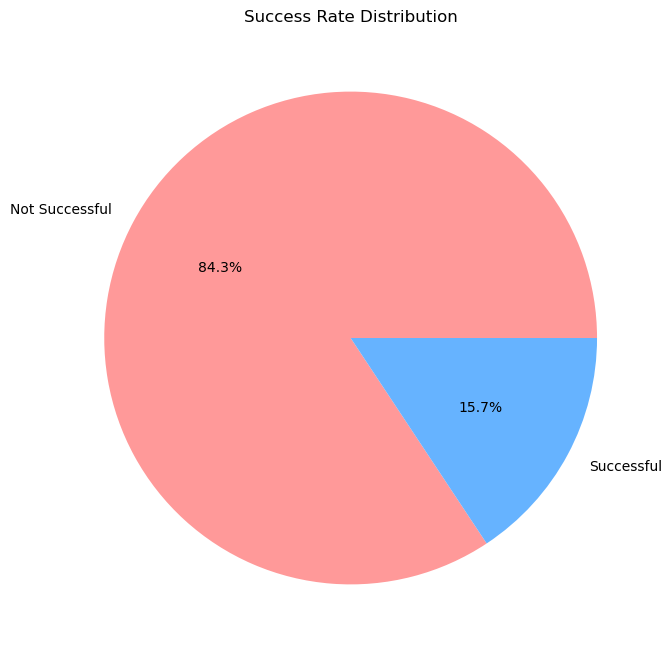

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(store_df['success'].value_counts(), labels=['Not Successful', 'Successful'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])

# Add title
plt.title('Success Rate Distribution')

plt.show()

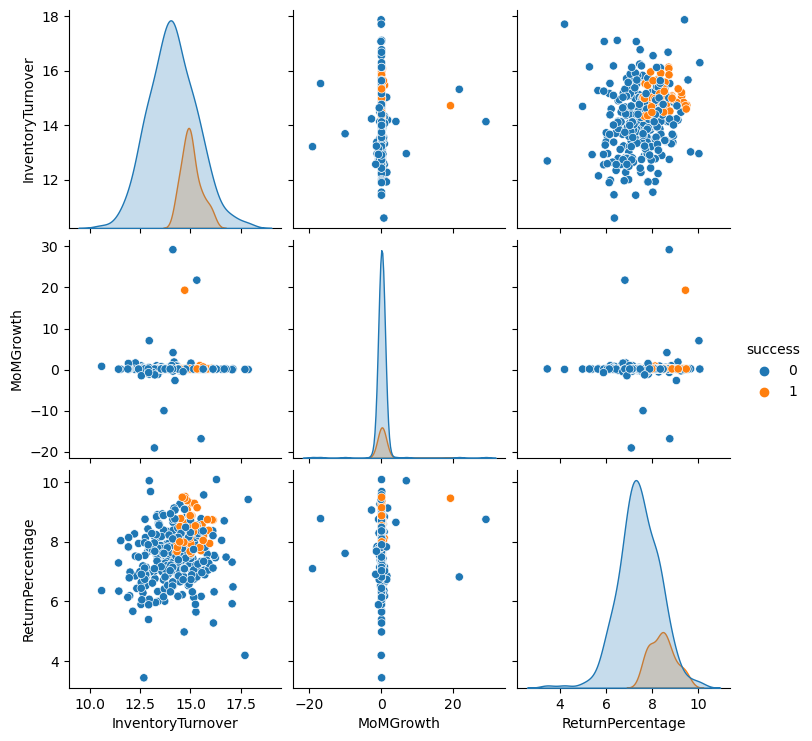

In [19]:
sns.pairplot(store_df[['InventoryTurnover', 'MoMGrowth', 'ReturnPercentage', 'success']], hue='success', diag_kind='kde')
plt.show()

# Data Engineering

In [20]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_geocoder")
unique_cities_df = pd.DataFrame(df['CITY'].unique(), columns=['CITY'])

def get_lat_long(city):
    location = geolocator.geocode(city)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None
    
unique_cities_df['LATITUDE'], unique_cities_df['LONGITUDE'] = zip(*unique_cities_df['CITY'].apply(get_lat_long))
store_df = pd.merge(store_df, unique_cities_df, on='CITY', how='left')

store_df = store_df.drop('CITY', axis=1)
store_df

,STORE,InventoryTurnover,MoMGrowth,ReturnPercentage,success,LATITUDE,LONGITUDE
0,102,17.067970,0.134112,7.312527,0,27.947760,-82.458444
1,103,15.201288,0.134761,7.972347,0,38.628028,-90.191015
2,107,15.731825,0.128466,7.734180,0,32.823462,-97.170568
3,202,14.662190,0.133792,8.138037,0,27.947760,-82.458444
4,203,15.064624,0.162371,9.287411,1,37.385998,-77.578509
...,...,...,...,...,...,...,...
320,9704,11.886295,0.127159,6.133152,0,39.027368,-95.762754
321,9709,12.559150,-1.502380,6.904091,0,38.457036,-101.818501
322,9804,13.989748,0.132606,7.026231,0,34.608685,-98.390331
323,9806,17.707598,0.040077,4.187669,0,34.655093,-92.386543


In [21]:
# Create interaction features
store_df['ITGP'] = store_df['InventoryTurnover'] * store_df['MoMGrowth']
store_df.fillna(store_df.mean(), inplace=True)

In [22]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
store_df[['InventoryTurnover', 'MoMGrowth', 'ReturnPercentage', 'ITGP']] = scaler.fit_transform(store_df[['InventoryTurnover', 'MoMGrowth', 'ReturnPercentage', 'ITGP']])
store_df = store_df[['STORE', 'InventoryTurnover', 'MoMGrowth', 'ReturnPercentage', 'ITGP', 'LATITUDE', 'LONGITUDE', 'success']]
store_df

,STORE,InventoryTurnover,MoMGrowth,ReturnPercentage,ITGP,LATITUDE,LONGITUDE,success
0,102,2.441593,-0.043061,-0.293760,-0.035012,27.947760,-82.458444,0
1,103,0.821509,-0.042829,0.414639,-0.040972,38.628028,-90.191015,0
2,107,1.281959,-0.045080,0.158937,-0.041654,32.823462,-97.170568,0
3,202,0.353629,-0.043176,0.592528,-0.043124,27.947760,-82.458444,0
4,203,0.702899,-0.032956,1.826522,-0.031120,37.385998,-77.578509,1
...,...,...,...,...,...,...,...,...
320,9704,-2.055556,-0.045548,-1.559964,-0.054282,39.027368,-95.762754,0
321,9709,-1.471589,-0.628249,-0.732266,-0.559348,38.457036,-101.818501,0
322,9804,-0.229980,-0.043600,-0.601133,-0.045765,34.608685,-98.390331,0
323,9806,2.996722,-0.076687,-3.648680,-0.074152,34.655093,-92.386543,0


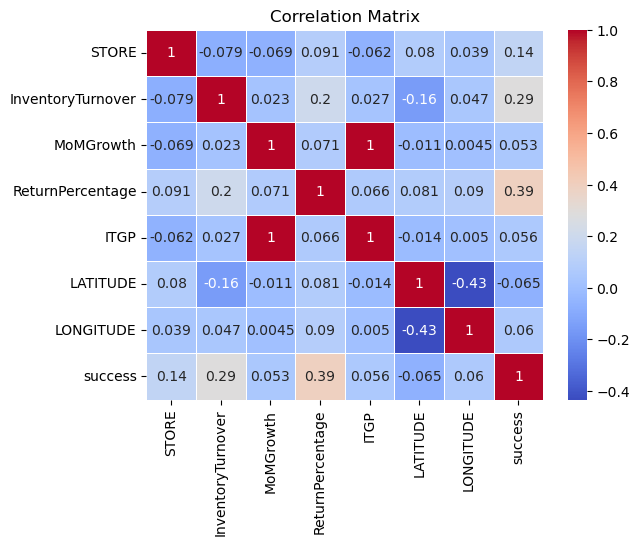

In [23]:
corr_matrix_add_interaction = store_df.corr()
sns.heatmap(corr_matrix_add_interaction, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Model Evaluation
Imbalanced dataset - using SMOTE

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = store_df[['InventoryTurnover', 'MoMGrowth', 'ReturnPercentage', 'ITGP']]
y = store_df['success']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=400)

# Use SMOTE to oversample the minority class in the training set only
smote = SMOTE(random_state=400)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# After SMOTE
print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())

#Before SMOTE
print("Number of samples in X_train:", X_train.shape[0])
print("Number of samples in X_train after SMOTE:", X_train_resampled.shape[0])

#After SMOTE
print("Number of samples in y_train:", y_train.shape[0])
print("Number of samples in y_train after SMOTE:", y_train_resampled.shape[0])

print("Number of samples in X_test:", X_test.shape[0])
print("Number of samples in y_test:", y_test.shape[0])

Class distribution before SMOTE:
success
0    220
1     40
Name: count, dtype: int64

Class distribution after SMOTE:
success
0    220
1    220
Name: count, dtype: int64
Number of samples in X_train: 260
Number of samples in X_train after SMOTE: 440
Number of samples in y_train: 260
Number of samples in y_train after SMOTE: 440
Number of samples in X_test: 65
Number of samples in y_test: 65


# Logistic Regression Model

In [25]:
import statsmodels.api as sm

# Add a constant to the features for the intercept term
X_train_resampled_with_const = sm.add_constant(X_train_resampled)

# Create a Logistic Regression model using statsmodels
logit_model_stats = sm.Logit(y_train_resampled, X_train_resampled_with_const)

# Fit the model
logit_result = logit_model_stats.fit()

# Display the summary
print(logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.403131
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                  440
Model:                          Logit   Df Residuals:                      435
Method:                           MLE   Df Model:                            4
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.4184
Time:                        22:29:55   Log-Likelihood:                -177.38
converged:                       True   LL-Null:                       -304.98
Covariance Type:            nonrobust   LLR p-value:                 4.900e-54
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4495      0.211     -6.865      0.000      -1.863      -1.036
Inventor

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Create a Logistic Regression model
logit_model = LogisticRegression(random_state=400)

# Fit the model on the resampled training set
logit_model.fit(X_train_resampled, y_train_resampled)

# Predictions on the original test set
y_pred = logit_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

logit_model.score(X_train_resampled, y_train_resampled), logit_model.score(X_test, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84        54
           1       0.38      0.73      0.50        11

    accuracy                           0.75        65
   macro avg       0.66      0.74      0.67        65
weighted avg       0.84      0.75      0.78        65



(0.8159090909090909, 0.7538461538461538)

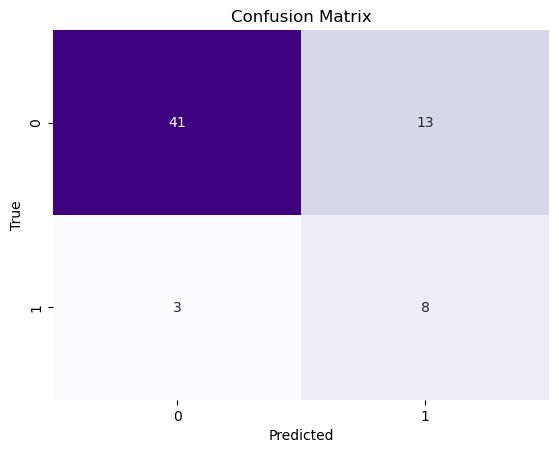

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Purples', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=400)
decision_tree_model.fit(X_train_resampled, y_train_resampled)
y_pred_dt = decision_tree_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

decision_tree_model.score(X_train_resampled, y_train_resampled), decision_tree_model.score(X_test, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        54
           1       0.89      0.73      0.80        11

    accuracy                           0.94        65
   macro avg       0.92      0.85      0.88        65
weighted avg       0.94      0.94      0.94        65



(1.0, 0.9384615384615385)

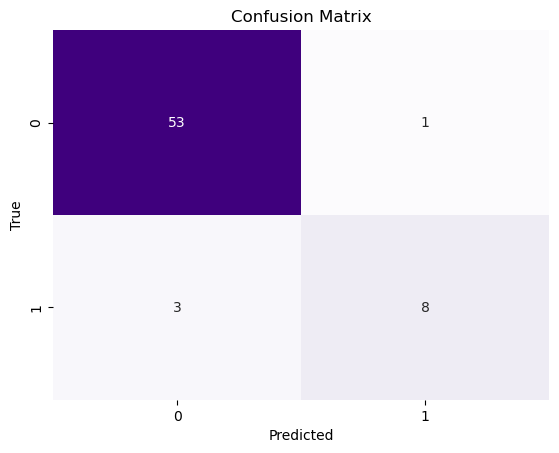

In [31]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='g', cmap='Purples', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=400)
random_forest_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = random_forest_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

random_forest_model.score(X_train_resampled, y_train_resampled), random_forest_model.score(X_test, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       1.00      0.73      0.84        11

    accuracy                           0.95        65
   macro avg       0.97      0.86      0.91        65
weighted avg       0.96      0.95      0.95        65



(1.0, 0.9538461538461539)

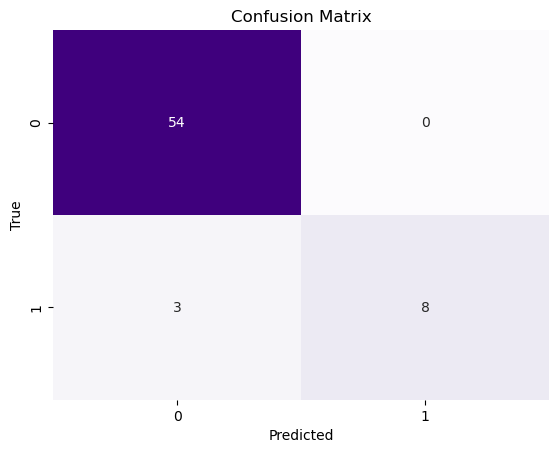

In [33]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='g', cmap='Purples', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# SVM

In [34]:
from sklearn.svm import SVC

svm_model = SVC(random_state=400)
svm_model.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

svm_model.score(X_train_resampled, y_train_resampled), svm_model.score(X_test, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        54
           1       0.55      1.00      0.71        11

    accuracy                           0.86        65
   macro avg       0.78      0.92      0.81        65
weighted avg       0.92      0.86      0.88        65



(0.9, 0.8615384615384616)

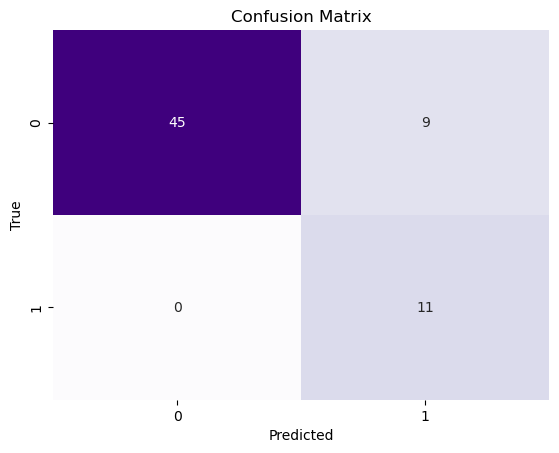

In [35]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='g', cmap='Purples', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

knn_model.score(X_train_resampled, y_train_resampled), knn_model.score(X_test, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91        54
           1       0.56      0.91      0.69        11

    accuracy                           0.86        65
   macro avg       0.77      0.88      0.80        65
weighted avg       0.91      0.86      0.87        65



(0.9363636363636364, 0.8615384615384616)

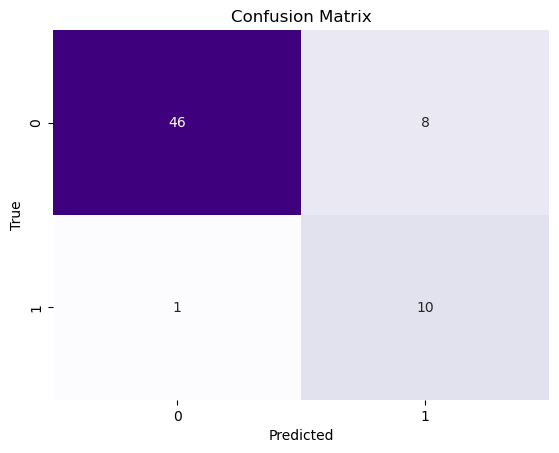

In [37]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='g', cmap='Purples', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# XGBOOST

In [38]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=400)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

xgb_model.score(X_train_resampled, y_train_resampled), xgb_model.score(X_test, y_test)


Confusion Matrix:
[[54  0]
 [ 3  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       1.00      0.73      0.84        11

    accuracy                           0.95        65
   macro avg       0.97      0.86      0.91        65
weighted avg       0.96      0.95      0.95        65



(0.9977272727272727, 0.9538461538461539)

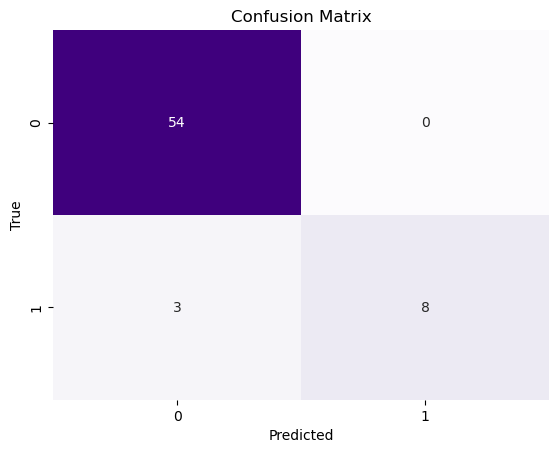

In [39]:
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='g', cmap='Purples', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Decision Region

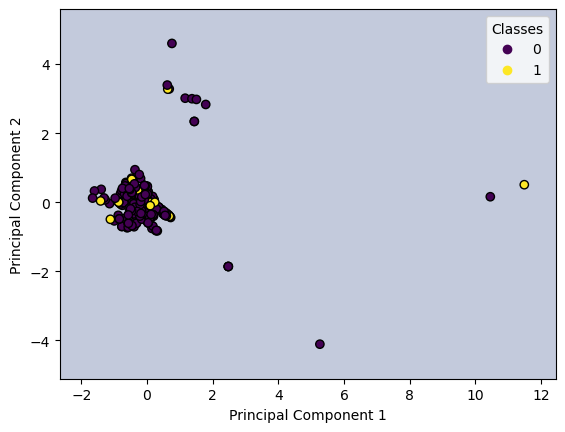

In [42]:
from sklearn.decomposition import PCA

# Assuming X contains your feature matrix, and y contains your target variable
X_selected = store_df[['LATITUDE', 'LONGITUDE']]
y_selected = store_df['success']

# Split the data into training and testing sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_selected_std = scaler.fit_transform(X_train_selected)
X_test_selected_std = scaler.transform(X_test_selected)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_train_selected_pca = pca.fit_transform(X_train_selected_std)

# Train your classifier (replace YourClassifier with your actual classifier)
clf = LogisticRegression()
clf.fit(X_train_selected_std, y_train_selected)

# Plot decision regions
x_min, x_max = X_train_selected_pca[:, 0].min() - 1, X_train_selected_pca[:, 0].max() + 1
y_min, y_max = X_train_selected_pca[:, 1].min() - 1, X_train_selected_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.contourf(xx, yy, Z, alpha=0.3)

# Scatter plot for training data with different classes
scatter = plt.scatter(X_train_selected_pca[:, 0], X_train_selected_pca[:, 1], c=y_train_selected, marker='o', edgecolors='k', label='Training Data')

# Add legend
legend = plt.legend(*scatter.legend_elements(), title='Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.show()